# Биномиальное распределение: асимптотика

In [1]:
import numpy as np
from scipy.stats import binom, poisson, norm
from math import exp, factorial, sqrt

import matplotlib.pyplot as plt

## Формула Пуассона

Пусть $X\sim Binom(n, \lambda/n)$. Тогда при больших $n$

$$
\begin{aligned}
	P(X=k)&\approx \frac{\lambda^k}{k!}\exp(-\lambda) & n&\gg 1
\end{aligned}
$$

__Замечаение__: фактически можно применять для случая $Binom(n,p)$ когда $n$ "большое", а $p$ "маленькое"

__Пример__ Пусть $X\sim Binom(n=500, p=0.01)$. Тогда $\lambda=np=5$

Имеем для $P(X=2)$

In [2]:
n = 500
p = 0.01
l = n*p

k=2

In [3]:
# точная формула
binom(n, p).pmf(k)

np.float64(0.08363103352119428)

In [4]:
# приближение Пуассона: непосредственное вычисление
exp(-l)*(l**k)/factorial(k)

0.08422433748856833

In [5]:
# приближение Пуассона: метод из scipy
poisson(l).pmf(2)

np.float64(0.08422433748856832)

## Формулы Муавра-Лапласа

Пусть $X\sim Binom(n,p)$ и

$$
\begin{aligned}
	\phi(t)&=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{t^2}{2}\right) & \Phi(t)&=\int_{-\infty}^t \phi(z)dz
\end{aligned}
$$

Тогда при больших $n$

- __Локальная формула Муавра-Лапласа__

$$
	P(X=k)\approx \frac{1}{\sqrt{np(1-p)}}\phi\left(\frac{k-np}{\sqrt{np(1-p)}}\right)
$$

- __Интегральная формула Муавра-Лапласа__

$$
\begin{aligned}
	P\left(a<\frac{X-np}{\sqrt{np(1-p)}}<b\right)&\approx\int_a^b \phi(t)dt=\Phi(b)-\Phi(a) \\
	P\left(\frac{X-np}{\sqrt{np(1-p)}}<b\right)&\approx\int_{-\infty}^b \phi(t)dt=\Phi(b) \\
	P\left(a<\frac{X-np}{\sqrt{np(1-p)}}\right)&\approx\int_a^{+\infty} \phi(t)dt=1-\Phi(a)
\end{aligned}
$$

__Пример 1__ Пусть $X\sim Binom(n=300, p=0.4)$

Вычислим $P(X=100)$

In [6]:
n, p, k = 300, 0.4, 100

In [7]:
# точная формула
binom(n, p).pmf(k)

np.float64(0.0028520685426985234)

In [8]:
# приближение Муавра-Лапласа: метод из scipy
norm.pdf((k-n*p)/sqrt(n*p*(1-p)))/sqrt(n*p*(1-p))

np.float64(0.0029232789328737384)

__Пример 1__ Пусть $X\sim Binom(n=5000, p=0.7)$

Вычислим 

$$
\begin{gathered}
	P\left(-2<\frac{X-np}{\sqrt{np(1-p)}}<1\right)=
	P\left(np-2\sqrt{np(1-p)}<X<np+\sqrt{np(1-p)}\right)=\\
	P\left(3500-2\sqrt{1050}<X<3500+\sqrt{1050}\right)=P(3435< X\leq 3532)
\end{gathered}
$$

In [9]:
n, p = 5000, 0.7

In [10]:
# точная формула
binom(n, p).cdf(3532)-binom(n, p).cdf(3435)

np.float64(0.8184721433573451)

In [11]:
# приближение Муавра-Лапласа: метод из scipy
norm.cdf(1)-norm.cdf(-2)

np.float64(0.8185946141203637)

Вычислим $P(100<X<150)$

In [12]:
# точная формула
binom(n, p).cdf(150)-binom(n, p).cdf(100)

np.float64(0.0)

По формуле Муавра-Лапласа

$$
	P(300<X<150)=P\left(\frac{100-np}{\sqrt{np(1-p)}}<\frac{X-np}{\sqrt{np(1-p)}}<\frac{150-np}{\sqrt{np(1-p)}}\right)
$$

In [13]:
# приближение Муавра-Лапласа: метод из scipy
norm.cdf((150-n*p)/sqrt(n*p*(1-p)))-norm.cdf((100-n*p)/sqrt(n*p*(1-p)))

np.float64(0.0)

## Визуализация приближения Пуассона

Пусть $X\sim Binom(n=500, p=0.01)$. Тогда $\lambda=np=5$

In [14]:
n, p = 500, 0.01
l = n*p

rv_binom = binom(n, p)
rv_poisson = poisson(l)

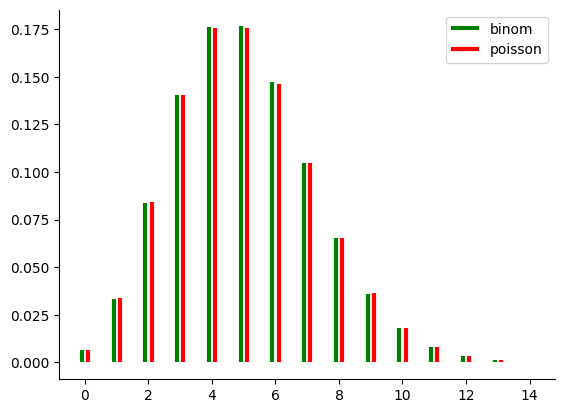

In [15]:
x = np.arange(15)

fig, ax =  plt.subplots(1,1)

# ax.vlines(x1, 0, rv1.pmf(x1), linestyle='-', lw=3,  colors='m', label='(3,0.3)')
ax.vlines(x-0.1, 0, rv_binom.pmf(x), linestyle='-', lw=3, colors='g', label='binom')
ax.vlines(x+0.1, 0, rv_poisson.pmf(x), linestyle='-', lw=3, colors='r', label='poisson')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

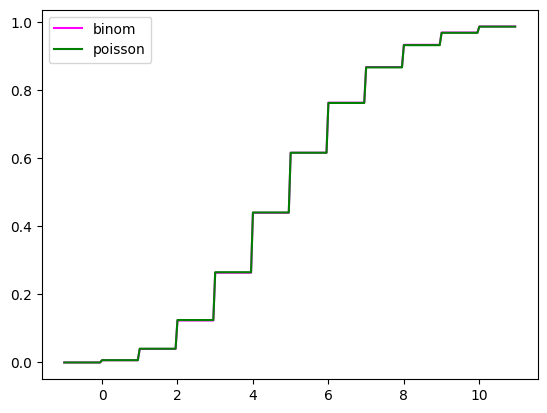

In [16]:
t = np.arange(-1, 11, 0.05)

plt.plot(t, rv_binom.cdf(t), color='magenta', label='binom')
plt.plot(t, rv_poisson.cdf(t), color='green', label='poisson')

plt.legend()
plt.show()

## Визуализация приближения Муавра-Лапласа

Пусть $X\sim Binom(n=500, p=0.7)$

Приближённая формула

$$
	P\left(\frac{X-np}{\sqrt{np(1-p)}}\leq t\right)=P(X\leq np+t\sqrt{np(1-p)})\approx \Phi(t)
$$

In [17]:
n, p = 500, 0.7

mu, sdev = n*p, sqrt(n*p*(1-p))

rv_binom = binom(n, p)
rv_norm = norm()

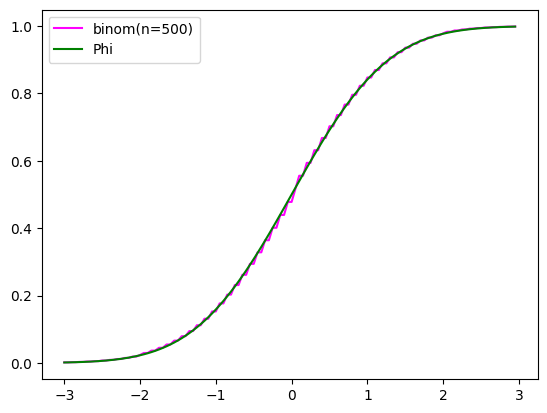

In [18]:
t = np.arange(-3, 3, 0.05)

plt.plot(t, rv_binom.cdf(mu+t*sdev), color='magenta', label='binom(n='+str(n)+')')
plt.plot(t, rv_norm.cdf(t), color='green', label='Phi')

plt.legend()
plt.show()

Пусть $Y\sim Binom(n=50, p=0.7)$

In [19]:
n, p = 50, 0.7

mu, sdev = n*p, sqrt(n*p*(1-p))

rv_binom = binom(n, p)
rv_norm = norm()

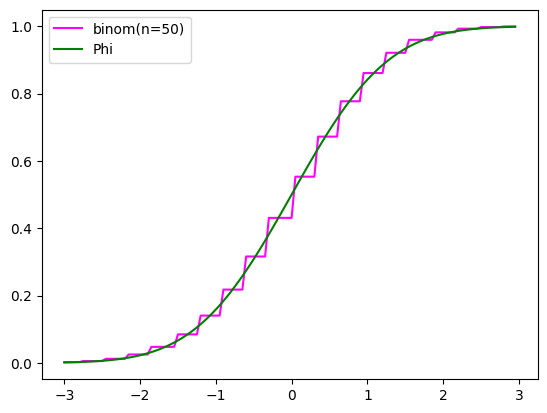

In [20]:
t = np.arange(-3, 3, 0.05)

plt.plot(t, rv_binom.cdf(mu+t*sdev), color='magenta', label='binom(n='+str(n)+')')
plt.plot(t, rv_norm.cdf(t), color='green', label='Phi')

plt.legend()
plt.show()